In [41]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import r2_score

In [42]:
data = pd.read_csv("RFECaO classification.csv")

X=data.values[:,0:-1]
# band gap，即目标值
y= data.values[:,-1]

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3,random_state=0)

In [44]:
kernel = 1.0 * RBF([1.0])
clf=GaussianProcessClassifier(max_iter_predict=10,kernel=kernel, warm_start=True)

[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 1.]


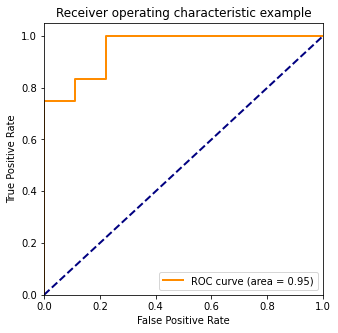

In [45]:
clf.fit(X, y)
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)

lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(y_test)
print(clf.predict(X_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


0.8666666666666667


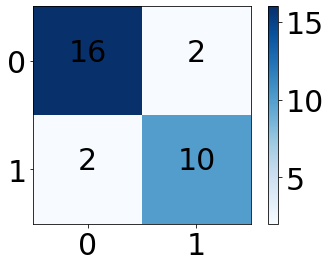

In [46]:
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
print(true/30)
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap='Blues')
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=30)
plt.yticks(indices, [0, 1],fontsize=30)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
         plt.text(first_index, second_index, C[first_index][second_index],fontsize=30,horizontalalignment='center')


plt.show()


In [47]:
clf = RandomForestClassifier(n_estimators=150)

[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]


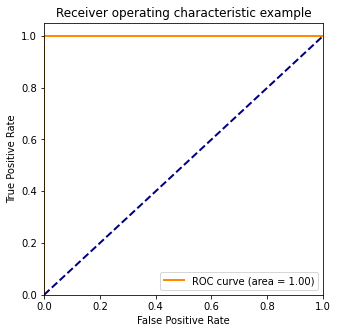

In [48]:
clf.fit(X, y)
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)

lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(y_test)
print(clf.predict(X_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

1.0


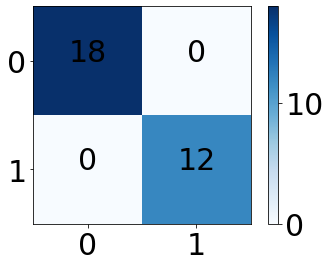

In [49]:
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
print(true/30)
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap='Blues')
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=30)
plt.yticks(indices, [0, 1],fontsize=30)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
         plt.text(first_index, second_index, C[first_index][second_index],fontsize=30,horizontalalignment='center')


plt.show()

In [50]:
clf = svm.SVC(C=3522, kernel='rbf', degree=2,probability=True)

[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1.]


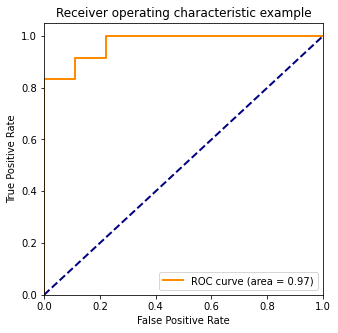

In [51]:
clf.fit(X, y)
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)

lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(y_test)
print(clf.predict(X_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

0.9


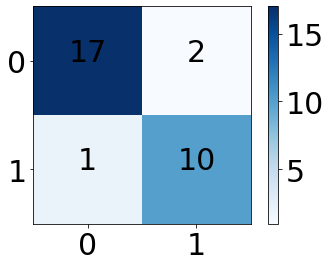

In [52]:
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
print(true/30)
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap='Blues')
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=30)
plt.yticks(indices, [0, 1],fontsize=30)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
         plt.text(first_index, second_index, C[first_index][second_index],fontsize=30,horizontalalignment='center')


plt.show()

In [53]:
clf=ExtraTreesClassifier(n_estimators=6, max_depth=None,min_samples_split=2, random_state=0)

[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]


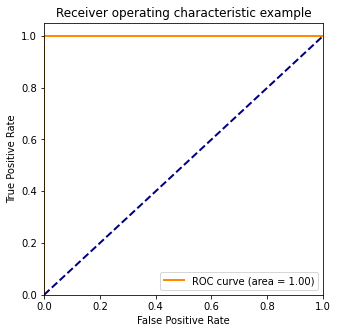

In [54]:
clf.fit(X, y)
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)

lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(y_test)
print(clf.predict(X_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

1.0


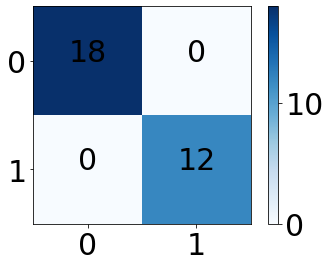

In [55]:
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
print(true/30)
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap='Blues')
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=30)
plt.yticks(indices, [0, 1],fontsize=30)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
         plt.text(first_index, second_index, C[first_index][second_index],fontsize=30,horizontalalignment='center')


plt.show()

In [56]:
clf = GradientBoostingClassifier(n_estimators=500)

[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]
[0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 1. 1.]


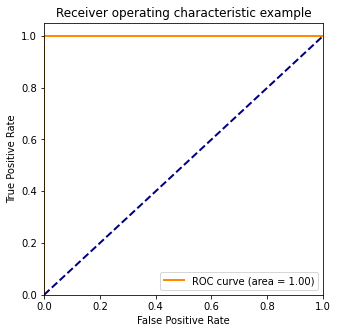

In [57]:
clf.fit(X, y)
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:,1])
roc_auc = auc(fpr,tpr)

lw = 2
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(y_test)
print(clf.predict(X_test))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

1.0


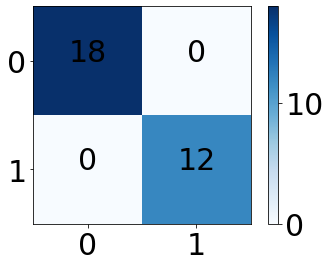

In [58]:
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
print(true/30)
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap='Blues')
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=30)
plt.yticks(indices, [0, 1],fontsize=30)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=30)
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
         plt.text(first_index, second_index, C[first_index][second_index],fontsize=30,horizontalalignment='center')


plt.show()